# Data Pre-processing and Visualization

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import re
import os

## Loading Data

We will load the featurized superconducting data, and their chemical compositions. We will do a rough determination of whether a compound is cuprate or not based on whether it has both $Cu$ and $O$.

In [2]:
X = pd.read_csv('data/superconductors/train.csv')
composition = pd.read_csv('data/superconductors/unique_m.csv')[['Cu', 'O']]
is_cuprate = pd.DataFrame(data={'is_cuprate': composition['Cu'] * composition['O']}, dtype=float)
is_cuprate = is_cuprate > 0
cuprate_X = X[is_cuprate['is_cuprate']==True]
not_cuprate_X = X[is_cuprate['is_cuprate']==False]

## Clustering Data using KMeans
We cannot in general separate all compounds into classes of superconductors as defined in the literature. Therefore, we use KMeans clustering on the chemical composition to create artificial classes.

In [3]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X.drop(["critical_temp"],axis=1)))

n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_X)
clusters = kmeans.predict(scaled_X)
X["Cluster"] = clusters
scaled_X["Cluster"] = clusters
scaled_X = pd.concat([scaled_X, is_cuprate], axis=1, join='inner')

## Data Visualization Using PCA
We compare the clustering results to cuprates and non-cuprates to see how well the clustering follows human convention in this one specific way.

In [12]:
plotX = pd.DataFrame(np.array(scaled_X.sample(5000, random_state=10)))
plotX.columns = scaled_X.columns
pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster","is_cuprate"], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX = pd.concat([plotX, PCs_2d], axis=1, join='inner')
clusters = [plotX[plotX["Cluster"] == i] for i in range(n_clusters)]

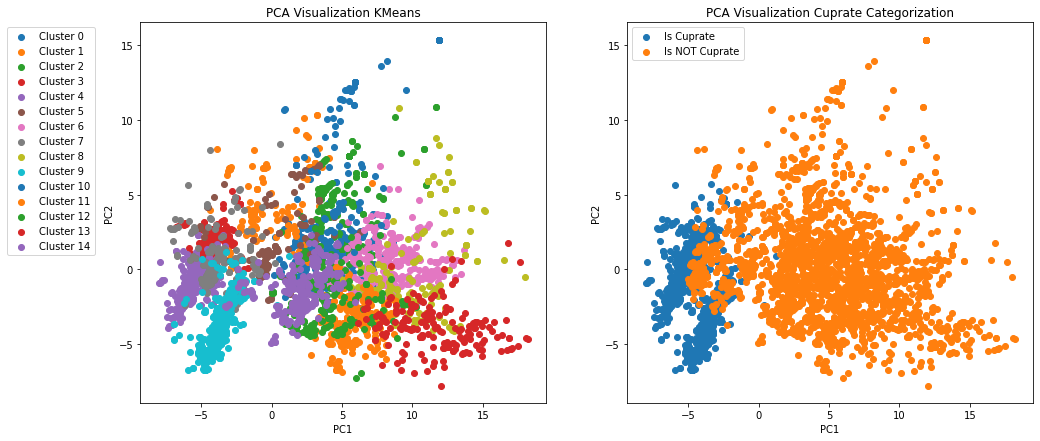

In [20]:
fig = plt.figure(figsize=(16, 7))
ax =fig.add_subplot(1,2,1)
ay =fig.add_subplot(1,2,2)

for i in range(n_clusters):

    ax.scatter(clusters[i]["PC1_2d"], clusters[i]["PC2_2d"], label = "Cluster {}".format(i))
    
for cuprate_or_not in ['Is Cuprate', 'Is NOT Cuprate']:
    
    x = plotX[plotX['is_cuprate'] == (cuprate_or_not=='Is Cuprate')]["PC1_2d"],
    y = plotX[plotX['is_cuprate'] == (cuprate_or_not=='Is Cuprate')]["PC2_2d"],
    ay.scatter(x, y, label = cuprate_or_not)

ax.set_title("PCA Visualization KMeans")
ax.legend(bbox_to_anchor=(-0.1, 1))
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ay.set_ylabel('PC2')
ay.set_xlabel('PC1')
ay.set_title("PCA Visualization Cuprate Categorization")
ay.legend()

We see that clusters 3, 4 and 9  obtained using KMeans clustering are roughly cuprates. However, this is rather confusing. We therefore need to use a better visualization tool.

## Data Visualization Using t-SNE
Results obtained via PCA is rather confusing. t-SNE is a more sophisticated method. We illustrate that here.

In [21]:
plotX = pd.DataFrame(np.array(scaled_X.sample(5000)))
plotX.columns = scaled_X.columns
#Set our perplexity
perplexity = 50
#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)
#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster","is_cuprate"], axis=1)))
TCs_2d.columns = ["TC1_2d","TC2_2d"]
plotX = pd.concat([plotX, TCs_2d], axis=1, join='inner')
clusters = [plotX[plotX["Cluster"] == i] for i in range(n_clusters)]

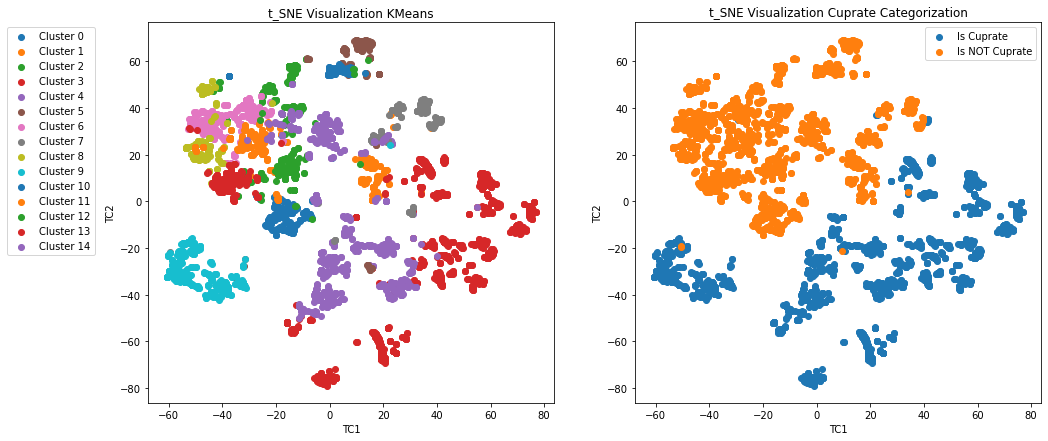

In [24]:
fig = plt.figure(figsize=(16, 7))
ax =fig.add_subplot(1,2,1)
ay =fig.add_subplot(1,2,2)

for i in range(n_clusters):

    ax.scatter(clusters[i]["TC1_2d"], clusters[i]["TC2_2d"], label = "Cluster {}".format(i))
    
for cuprate_or_not in ['Is Cuprate', 'Is NOT Cuprate']:
    
    x = plotX[plotX['is_cuprate'] == (cuprate_or_not=='Is Cuprate')]["TC1_2d"],
    y = plotX[plotX['is_cuprate'] == (cuprate_or_not=='Is Cuprate')]["TC2_2d"],
    ay.scatter(x, y, label = cuprate_or_not)

ax.set_title("t_SNE Visualization KMeans")
ax.legend(bbox_to_anchor=(-0.12, 1))
ax.set_ylabel('TC2')
ax.set_xlabel('TC1')
ay.set_ylabel('TC2')
ay.set_xlabel('TC1')
ay.set_title("t_SNE Visualization Cuprate Categorization")
ay.legend()

With t-SNE, it is clear that cuprates correspond to clusters 3, 4 and 9 and there are few mis-categorizations.

## Redo Clustering on Cuprates
Since we will hold cuprates from training, we need to redo clustering on non-cuprate families.

In [26]:
scaler = StandardScaler()


scaled_cuprate_X = pd.DataFrame(scaler.fit_transform(cuprate_X.drop(["critical_temp"],axis=1)))
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_cuprate_X)
cuprate_clusters = kmeans.predict(scaled_cuprate_X)
cuprate_X["Cluster"] = cuprate_clusters
scaled_cuprate_X["Cluster"] = cuprate_clusters


scaled_X = pd.DataFrame(scaler.fit_transform(not_cuprate_X.drop(["critical_temp"],axis=1)))
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_X)
clusters = kmeans.predict(scaled_X)
not_cuprate_X["Cluster"] = clusters
scaled_X["Cluster"] = clusters

<ipython-input-26-14954b69419c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-14954b69419c>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
cuprate_plotX = pd.DataFrame(np.array(scaled_cuprate_X.sample(5000)))
cuprate_plotX.columns = scaled_cuprate_X.columns
#Set our perplexity
perplexity = 50
#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)
#This DataFrame contains two dimensions, built by T-SNE
cuprate_TCs_2d = pd.DataFrame(tsne_2d.fit_transform(cuprate_plotX.drop(["Cluster"], axis=1)))
cuprate_TCs_2d.columns = ["TC1_2d","TC2_2d"]
cuprate_plotX = pd.concat([cuprate_plotX, cuprate_TCs_2d], axis=1, join='inner')
cuprate_clusters = [cuprate_plotX[cuprate_plotX["Cluster"] == i] for i in range(n_clusters)]



plotX = pd.DataFrame(np.array(scaled_X.sample(5000)))
plotX.columns = scaled_X.columns
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
TCs_2d.columns = ["TC1_2d","TC2_2d"]
plotX = pd.concat([plotX, TCs_2d], axis=1, join='inner')
clusters = [plotX[plotX["Cluster"] == i] for i in range(n_clusters)]

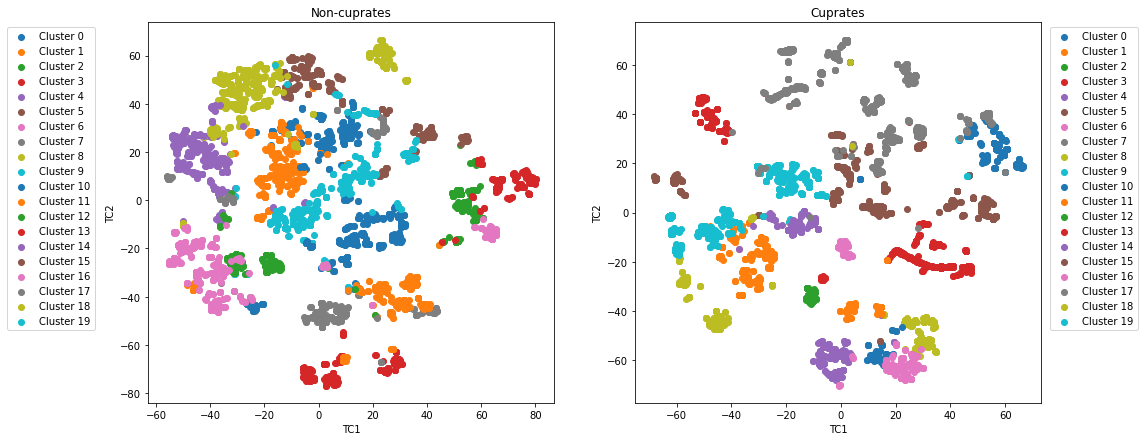

In [31]:
fig = plt.figure(figsize=(16, 7))
ax =fig.add_subplot(1,2,1)
ay =fig.add_subplot(1,2,2)

for i in range(n_clusters):

    ax.scatter(clusters[i]["TC1_2d"], clusters[i]["TC2_2d"], label = "Cluster {}".format(i))
    
for i in range(n_clusters):
    
    ay.scatter(cuprate_clusters[i]["TC1_2d"], cuprate_clusters[i]["TC2_2d"], label = "Cluster {}".format(i))

ax.set_title("Non-cuprates")
ax.legend(bbox_to_anchor=(-0.12, 1))
ax.set_ylabel('TC2')
ax.set_xlabel('TC1')
ay.set_ylabel('TC2')
ay.set_xlabel('TC1')
ay.set_title("Cuprates")
ay.legend(bbox_to_anchor=(1.25, 1))

## Saving Clustering Results

In [32]:
not_cuprate_X.to_csv('data/superconductors/not_cuprate.csv')
cuprate_X.to_csv('data/superconductors/cuprate.csv')

# Training Prototypical Network

We will run the training script and output the performance to './Prototypical_Network/history.out'

In [33]:
os.chdir('./Prototypical_Network')
!python -u train_eval.py --train.epochs 30 > history.out
os.chdir('../')


100%|##########| 100/100 [00:02<00:00, 40.18it/s]

100%|##########| 100/100 [00:02<00:00, 39.68it/s]

100%|##########| 100/100 [00:02<00:00, 40.20it/s]

100%|##########| 100/100 [00:01<00:00, 64.67it/s]

100%|##########| 100/100 [00:01<00:00, 63.36it/s]

100%|##########| 100/100 [00:01<00:00, 63.26it/s]

100%|##########| 100/100 [00:01<00:00, 63.59it/s]

100%|##########| 100/100 [00:01<00:00, 62.19it/s]

100%|##########| 100/100 [00:01<00:00, 62.87it/s]

100%|##########| 100/100 [00:01<00:00, 62.72it/s]

100%|##########| 100/100 [00:01<00:00, 63.18it/s]

100%|##########| 100/100 [00:01<00:00, 63.98it/s]

100%|##########| 100/100 [00:01<00:00, 62.40it/s]

100%|##########| 100/100 [00:01<00:00, 64.64it/s]

100%|##########| 100/100 [00:01<00:00, 63.90it/s]

100%|##########| 100/100 [00:01<00:00, 63.67it/s]

100%|##########| 100/100 [00:01<00:00, 63.44it/s]

100%|##########| 100/100 [00:01<00:00, 63.57it/s]

100%|##########| 100/100 [00:01<00:00, 63.64it/s]

100%|##########| 100/100 [00:0

Reading Performance From File

In [34]:
accuracies = []
read = False
acc_pattern = re.compile(r'Validation')
file = open('./Prototypical_Network/history.out', 'r')
lines = file.readlines()
for line in lines:
    if read:
        acc = float(line[-8:])
        accuracies.append(acc)
        read = False
    else:
        res = re.search(acc_pattern, line)
        if res != None:
            read = True

Plotting Performance

Text(0.5, 1.0, 'Prototypical Network Performance')

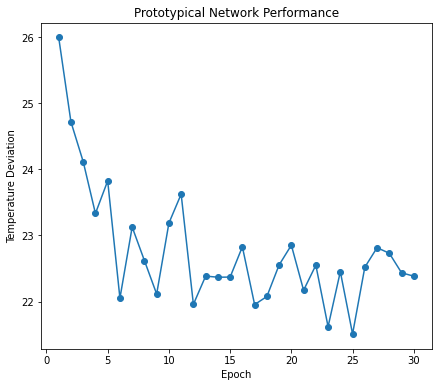

In [38]:
x = np.linspace(1, len(accuracies), num=len(accuracies))
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(x, np.array(accuracies), 'o-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Temperature Deviation')
ax.set_title('Prototypical Network Performance')

# Training MAML

We will run the training script and output the performance to './MAML/history.out'

In [39]:
os.chdir('./MAML')
!python -u train_eval.py --update_step_test 50 > history.out
os.chdir('../')

Reading Performance From File

In [40]:
accuracies = []
test_losses = []
min_test_loss = 1000
episode_losses = np.zeros(0)
read = False
acc_pattern = re.compile(r'Test loss')
num_pattern = re.compile(r'\d*\.\d*')
end_pattern = re.compile(r'\]')
file = open('./MAML/history.out', 'r')
lines = file.readlines()
for line in lines:
    res = re.search(acc_pattern, line)
    if res != None:
        read = True
    if read:
        res = num_pattern.findall(line)
        res = np.array([float(loss) for loss in res])
        episode_losses = np.concatenate((episode_losses, res))
        res = re.search(end_pattern, line)
        if res != None:
            read = False
            episode_loss = episode_losses.min()
            test_losses.append(episode_loss)
            if episode_loss < min_test_loss:
                min_test_loss = episode_losses.min()
                min_episode_losses = episode_losses
            episode_losses =  np.zeros(0)

Plotting Performance

Text(0.5, 1.0, 'Model Agnostic Meta Learning Fine Tuning Performance')

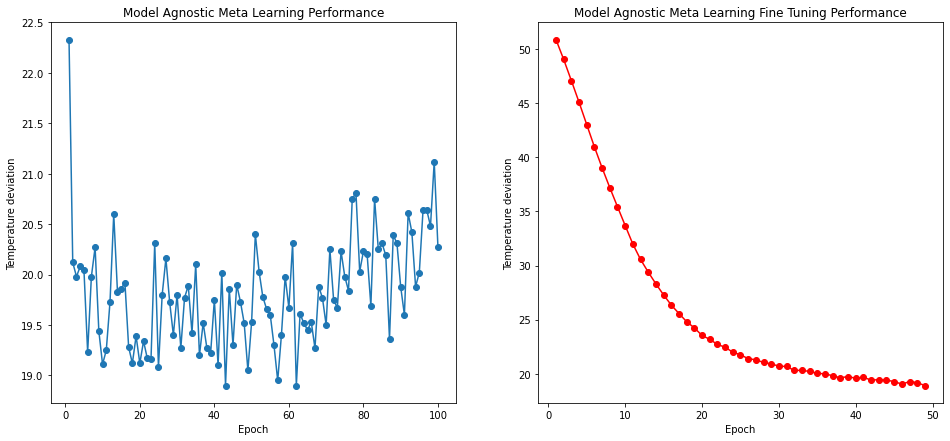

In [44]:
x1 = np.linspace(1, len(test_losses), num=len(test_losses))
x2 = np.linspace(1, len(min_episode_losses), num=len(min_episode_losses))

fig = plt.figure(figsize=(16, 7))
ax =fig.add_subplot(1,2,1)
ay =fig.add_subplot(1,2,2)

ax.plot(x1, np.array(test_losses), 'o-')
ay.plot(x2, np.array(min_episode_losses), 'ro-')

ax.set_title("Model Agnostic Meta Learning Performance")
ax.set_ylabel('Temperature deviation')
ax.set_xlabel('Epoch')
ay.set_ylabel('Temperature deviation')
ay.set_xlabel('Epoch')
ay.set_title("Model Agnostic Meta Learning Fine Tuning Performance")